In [14]:

# general data and data viz imports
import pandas as pd
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from copy import copy
# adjusting display restrictions 
pd.options.display.max_columns = 100
pd.options.display.max_rows = 3000
# setting preference to remove scientific notation 
pd.options.display.float_format = '{:,.2f}'.format

%matplotlib inline

---
## Concentating temp_csv files
Originally downloaded individually 

In [15]:
# Create a files variable that contains all of our data files.
files = os.listdir('../data/temp_csvs/')
files[:10]

['18-tavg-all-12-2016-2021.csv',
 '36-tavg-all-12-2016-2021.csv',
 '41-tavg-all-12-2016-2021.csv',
 '2-tavg-all-12-2016-2021.csv',
 '10-tavg-all-12-2016-2021.csv',
 '23-tavg-all-12-2016-2021.csv',
 '24-tavg-all-12-2016-2021.csv',
 '39-tavg-all-12-2016-2021.csv',
 '17-tavg-all-12-2016-2021.csv',
 '5-tavg-all-12-2016-2021.csv']

In [16]:
# importing one file to check out the shape for compariason post concatentation
sample_df = pd.read_csv('../data/temp_csvs/18-tavg-all-12-2016-2021.csv')
sample_df.head()

,Date,Value,Anomaly,State
0,201601,32.10,-0.30,Maryland
1,201602,36.90,3.10,Maryland
2,201603,49.40,6.90,Maryland
3,201604,53.10,1.00,Maryland
4,201605,60.90,-1.40,Maryland


In [17]:
# concatenating all files in temp folder 
for file in files:
    #print(file)
    
    df_list = [pd.read_csv(f'../data/temp_csvs/{file}') for file in files]    

temp_df = pd.concat(df_list)
    
print(temp_df.tail())
temp_df.head()


      Date  Value  Anomaly      State
67  202108  77.20     1.20  Tennessee
68  202109  69.70    -0.50  Tennessee
69  202110  63.40     4.60  Tennessee
70  202111  45.60    -1.80  Tennessee
71  202112  50.50    11.30  Tennessee


,Date,Value,Anomaly,State
0,201601,32.10,-0.30,Maryland
1,201602,36.90,3.10,Maryland
2,201603,49.40,6.90,Maryland
3,201604,53.10,1.00,Maryland
4,201605,60.90,-1.40,Maryland


In [18]:
assert temp_df.shape[0] ==sample_df.shape[0]*48 # no errors shape checked out 

In [19]:
# beginning cleaning and required minimal EDA for cleaning to export
temp_df.columns

Index(['Date', 'Value', 'Anomaly', 'State'], dtype='object')

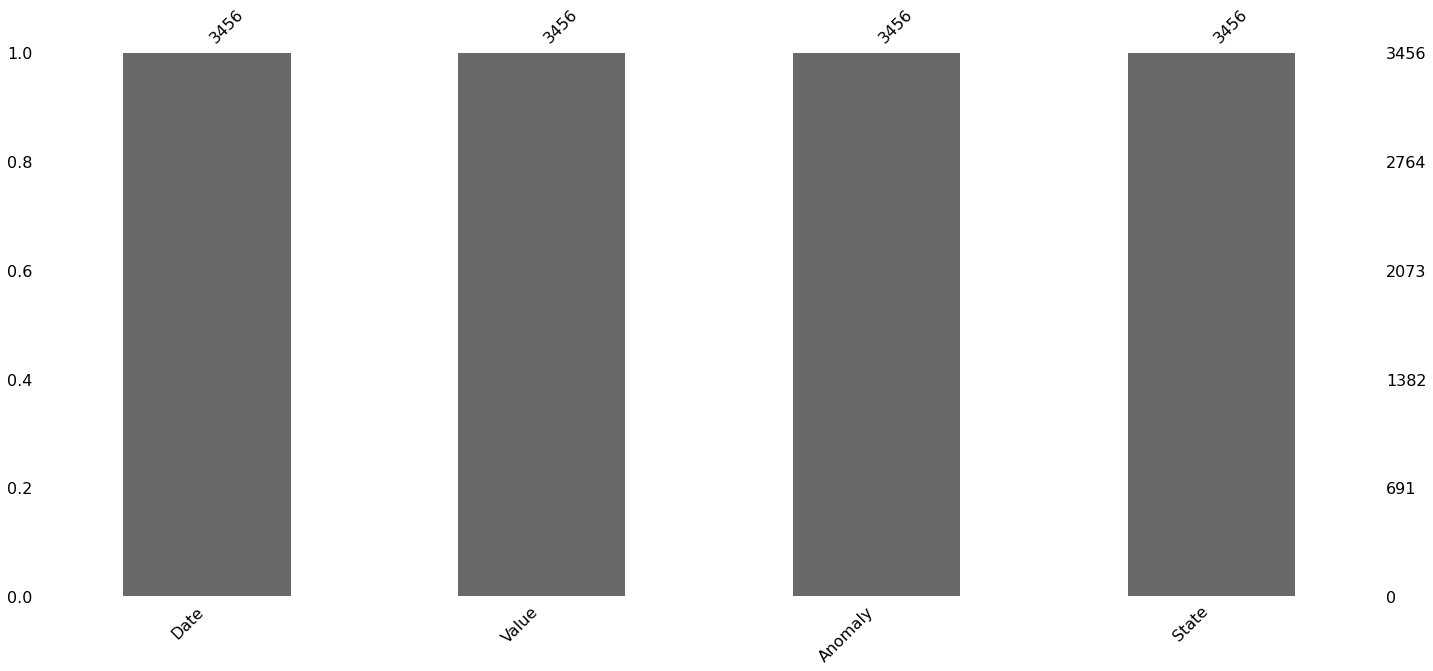

In [20]:
msno.bar(temp_df);

No missing data which is great but also expected from returning to our data source. 

---
## Extracting month and year from 'Date' column 

In [21]:
# quickly lowercasing all the column names
temp_df.columns = temp_df.columns.str.lower()
temp_df.head(2)

,date,value,anomaly,state
0,201601,32.10,-0.30,Maryland
1,201602,36.90,3.10,Maryland


In [22]:
def split_on_len(ref_len,length,df,column):
    yr_list=[]
    mnth_lst=[]
    for obs in df[column]:
        string = str(obs)
        if len(string) != ref_len:
            print('does not match format')
        else:
            year = string[:length]
            yr_list.append(year)
            month = string[length:]
            mnth_lst.append(month)
    return mnth_lst,yr_list

mnth_lst,yr_list= split_on_len(6,4,temp_df,'date')

temp_df['month']=mnth_lst
temp_df['year']= yr_list
temp_df.drop(columns='date',inplace=True)
temp_df.head()

,value,anomaly,state,month,year
0,32.10,-0.30,Maryland,01,2016
1,36.90,3.10,Maryland,02,2016
2,49.40,6.90,Maryland,03,2016
3,53.10,1.00,Maryland,04,2016
4,60.90,-1.40,Maryland,05,2016


## Formatting state column to abbreviations

In [29]:
!pip install us
import us

In [41]:

statez = us.states.mapping('name', 'abbr')
lst_of_abbrv = statez.keys()
lst_of_states = statez.values()
lst_of_abbrv

dict_keys(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'American Samoa', 'Guam', 'Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands', 'District of Columbia', 'Dakota', 'Orleans', 'Philippine Islands'])

In [42]:
lst_of_states

dict_values(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'AS', 'GU', 'MP', 'PR', 'VI', 'DC', 'DK', 'OL', 'PI'])

In [48]:
statez['Arkanas']

KeyError: 'Arkanas'

In [65]:
def replace_states(state):
    # find all states that exist in the string
    
    # replace each state with its abbreviation
    if state in statez:
        state = state.replace(state, statez[state])
    else: 
        pass

    # return the modified string (or original if no states were found)
    return state

temp_df['new_state']=temp_df['state'].apply(replace_states)

In [56]:
temp_df.tail()

,value,anomaly,state,month,year,new_state
67,77.20,1.20,Tennessee,08,2021,TN
68,69.70,-0.50,Tennessee,09,2021,TN
69,63.40,4.60,Tennessee,10,2021,TN
70,45.60,-1.80,Tennessee,11,2021,TN
71,50.50,11.30,Tennessee,12,2021,TN


In [64]:
# checking the state column for non abbv states 
states_not_identified = []
for state in temp_df['new_state']:
    if len(state)!=2:
        states_not_identified.append(state)
set(states_not_identified)

{'Arkanas'}

In [69]:
temp_df['new_state'].replace('Arkanas','AK',inplace=True)
temp_df.drop(columns='state',inplace=True)
temp_df.rename(columns={'new_state':'state'},inplace=True)

In [68]:
temp_df.head()

,value,anomaly,month,year,state
0,32.10,-0.30,01,2016,MD
1,36.90,3.10,02,2016,MD
2,49.40,6.90,03,2016,MD
3,53.10,1.00,04,2016,MD
4,60.90,-1.40,05,2016,MD


In [70]:
temp_df.tail()

,value,anomaly,month,year,state
67,77.20,1.20,08,2021,TN
68,69.70,-0.50,09,2021,TN
69,63.40,4.60,10,2021,TN
70,45.60,-1.80,11,2021,TN
71,50.50,11.30,12,2021,TN


In [71]:
temp_df.to_csv('../data/temp_cleaned.csv',index=False)